In [124]:
import pandas as pd

# Load the Excel file
file_path = "Session-Summary-for-E6-project.xlsx"  # Update path if needed
df = pd.read_excel(file_path)

# --- Basic Information ---
print("🔍 Dataset Overview")
print(f"Shape of data (rows, columns): {df.shape}")
print("\n🧩 Column Names and Data Types:")
print(df.dtypes)

# --- Missing Values ---
print("\n⚠️ Missing Values:")
print(df.isnull().sum())

# --- Unique Values and Duplicates ---
print("\n🔁 Checking for Duplicate Summaries:")
duplicate_count = df.duplicated(subset=["Session_Summary"]).sum()
print(f"Number of duplicate summaries: {duplicate_count}")

# --- Summary Statistics for Serial Number ---
print("\n📊 Summary Statistics for Serial Number:")
print(df["SerialNo"].describe())

# --- Summary Statistics for Text Column ---
print("\n🧠 Summary Stats for Session_Summary:")
print(f"Total Summaries: {len(df)}")
print(f"Unique Summaries: {df['Session_Summary'].nunique()}")

# --- Display First Few Records ---
print("\n📌 First 5 Summaries:")
print(df.head(5))
    

🔍 Dataset Overview
Shape of data (rows, columns): (668, 2)

🧩 Column Names and Data Types:
SerialNo            int64
Session_Summary    object
dtype: object

⚠️ Missing Values:
SerialNo           0
Session_Summary    0
dtype: int64

🔁 Checking for Duplicate Summaries:
Number of duplicate summaries: 1

📊 Summary Statistics for Serial Number:
count    668.000000
mean     334.500000
std      192.979273
min        1.000000
25%      167.750000
50%      334.500000
75%      501.250000
max      668.000000
Name: SerialNo, dtype: float64

🧠 Summary Stats for Session_Summary:
Total Summaries: 668
Unique Summaries: 667

📌 First 5 Summaries:
   SerialNo  \
0         1   
1         2   
2         3   
3         4   
4         5   

                                                                                                                                                                                                                                                                                

Cleaning data

In [125]:
import re
import html

def clean_text(text):
    text = html.unescape(text)                    # Handle encoded HTML symbols
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)    # Remove non-ASCII characters (e.g. â€™)
    text = re.sub(r'\s+', ' ', text)              # Remove extra whitespace
    return text.strip()

df['Cleaned_Summary'] = df['Session_Summary'].astype(str).apply(clean_text)

📊 Character Count Stats:
 count     668.000000
mean     1296.411677
std       877.348247
min        26.000000
25%       723.750000
50%      1099.500000
75%      1608.750000
max      9174.000000
Name: char_count, dtype: float64

📊 Word Count Stats:
 count     668.000000
mean      210.781437
std       146.405631
min         1.000000
25%       113.000000
50%       174.500000
75%       268.250000
max      1385.000000
Name: word_count, dtype: float64


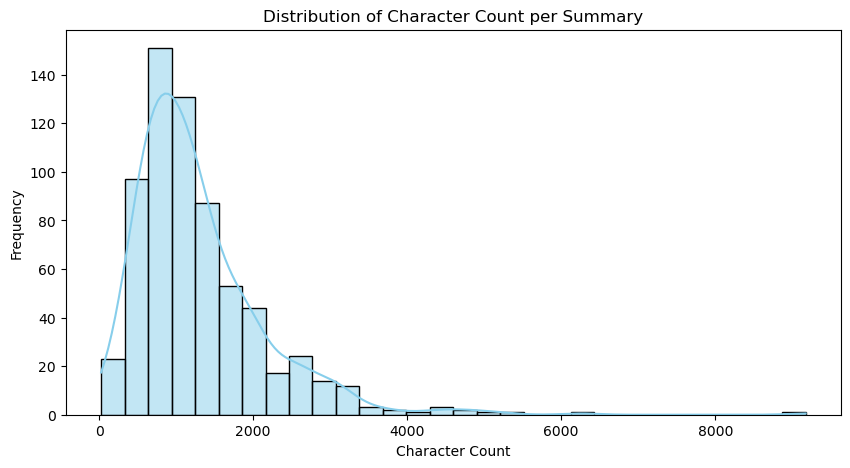

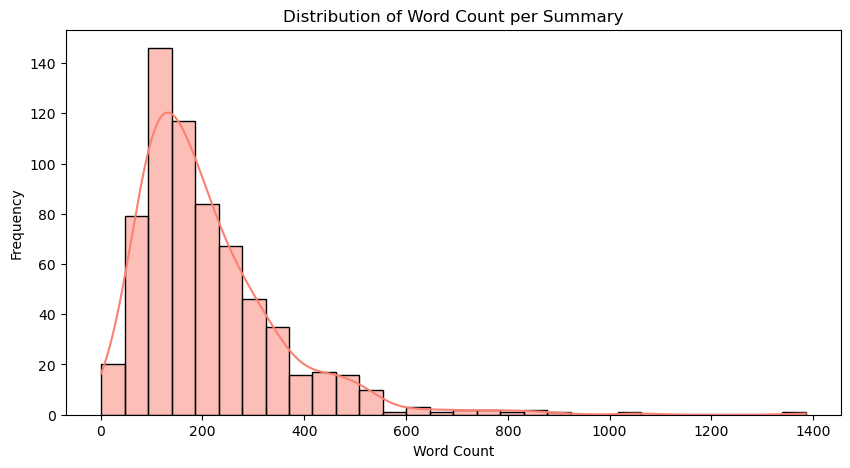


📝 Shortest Summary:
 https://docs.google.com/forms/d/e/1faipqlsffcpe8ytvk7pee7cslz0xgjhjk3_a8y7jo1abmkldxnrim4a/closedform

📝 Longest Summary:
 during exploratory data analysis we get insights on type of data and understand problems present in the data. we can remove outliers based on trend followed by data: if all data follows a particular trend and some doesn't follow we can remove this data. we can use data smoothening to reduce noise in data. real data has a lot of fluctuations. this can make it difficult to find trends ir pattern in such data. simple moving average sma consider a window around every data points and average the values. window width can be varied to adjust the level of smoothening. based on application we can take window width. we can take moving average at a point as average of all past points or average of some past and some future points. there will be problems at the end of data as there won't be any points to the past of starting of data. so we have to define 

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data


# Character and word count for each summary
df['char_count'] =df['Cleaned_Summary'].apply(len)
df['word_count'] = df['Cleaned_Summary'].apply(lambda x: len(str(x).split()))

# Basic statistics
print("📊 Character Count Stats:\n", df['char_count'].describe())
print("\n📊 Word Count Stats:\n", df['word_count'].describe())

# Plotting character count distribution
plt.figure(figsize=(10,5))
sns.histplot(df['char_count'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Character Count per Summary")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

# Plotting word count distribution
plt.figure(figsize=(10,5))
sns.histplot(df['word_count'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Word Count per Summary")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Shortest and longest summaries
shortest = df.loc[df['word_count'].idxmin()]
longest = df.loc[df['word_count'].idxmax()]

print("\n📝 Shortest Summary:\n", shortest['Session_Summary'])
print("\n📝 Longest Summary:\n", longest['Session_Summary'])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


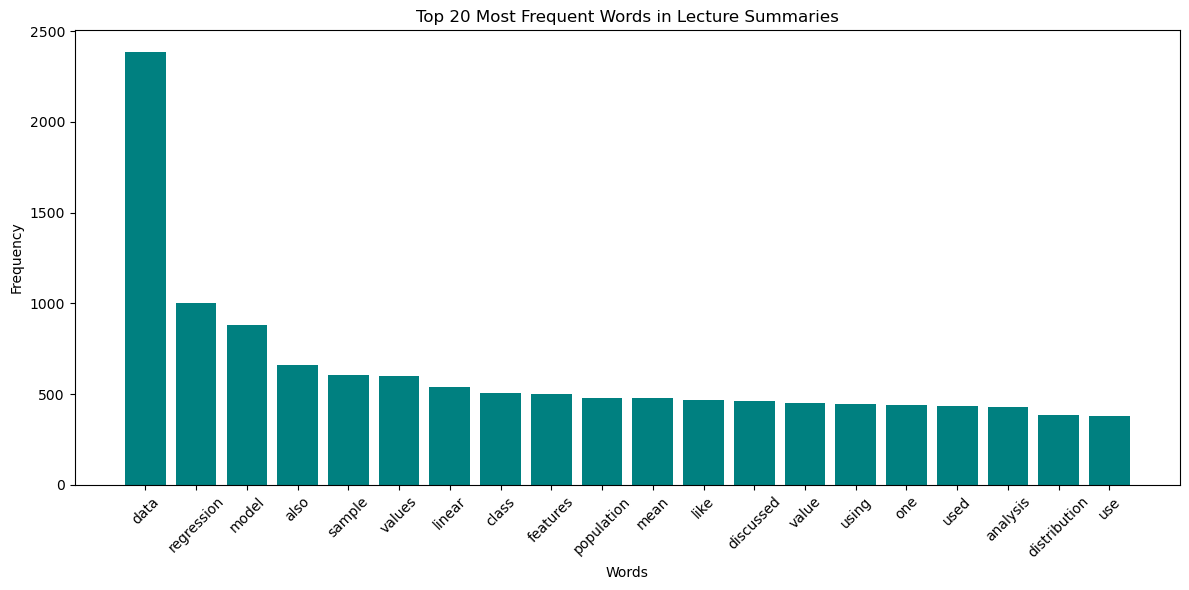

In [128]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string
import matplotlib.pyplot as plt

# Download stopwords if not already present
nltk.download('stopwords')

# Load data


# Combine all summaries into one string
text = " ".join(df['Cleaned_Summary'].dropna().astype(str)).lower()

# Remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))

# Tokenize
words = text.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

# Count word frequencies
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(20)

# Convert to DataFrame for plotting
common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12, 6))
plt.bar(common_df['Word'], common_df['Frequency'], color='teal')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Lecture Summaries")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


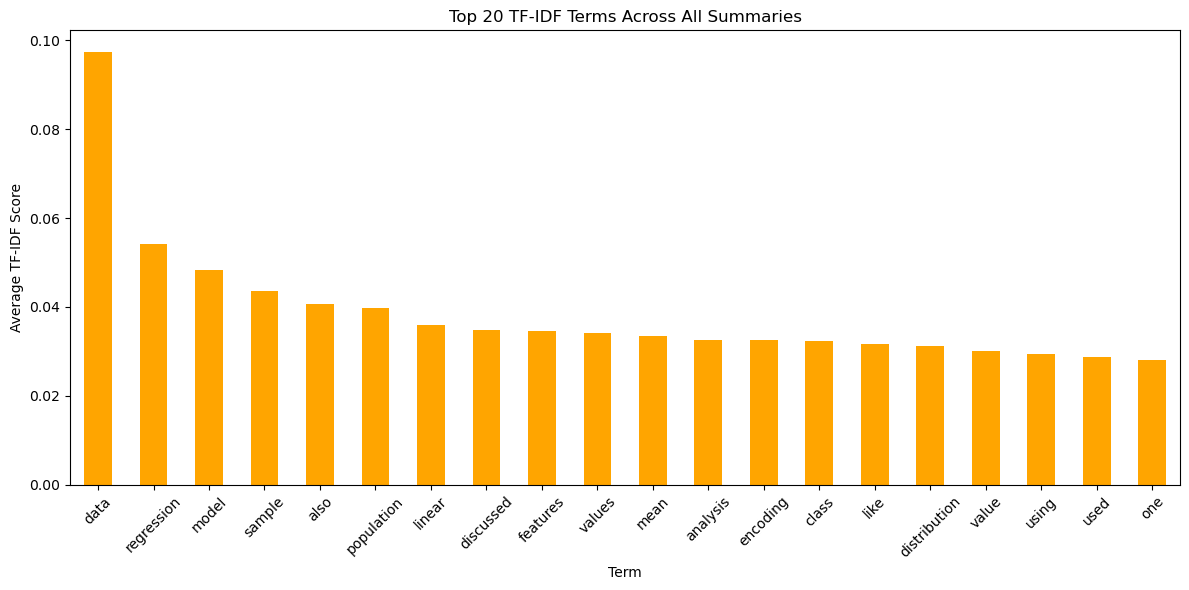

In [93]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load data

summaries = df['Cleaned_Summary'].dropna().astype(str)

# Define stopwords
stop_words = set(stopwords.words('english'))

# Clean the summaries
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

cleaned_summaries = summaries.apply(clean_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(cleaned_summaries)

# Convert to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Get top average TF-IDF terms
avg_tfidf_scores = tfidf_df.mean().sort_values(ascending=False).head(20)

# Plot the top terms
plt.figure(figsize=(12, 6))
avg_tfidf_scores.plot(kind='bar', color='orange')
plt.title("Top 20 TF-IDF Terms Across All Summaries")
plt.xlabel("Term")
plt.ylabel("Average TF-IDF Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



 Re-create the lost connection between the sessions and their summaries.
• Two different text featurization methods should be tried and the best one finally selected.

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load data

summaries = df['Cleaned_Summary'].dropna().astype(str)

# Preprocess summaries (reuse earlier clean_text function)
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

cleaned_summaries = summaries.apply(clean_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_summaries)

# Cosine similarity
tfidf_similarity = cosine_similarity(tfidf_matrix)

# Display similarity matrix
tfidf_similarity_df = pd.DataFrame(tfidf_similarity)
print(tfidf_similarity_df.head())


        0         1         2         3        4         5         6    \
0  1.000000  0.048361  0.071107  0.117965  0.00614  0.078623  0.103988   
1  0.048361  1.000000  0.031020  0.021478  0.00000  0.010332  0.025824   
2  0.071107  0.031020  1.000000  0.027052  0.00000  0.223549  0.162709   
3  0.117965  0.021478  0.027052  1.000000  0.00000  0.058872  0.028720   
4  0.006140  0.000000  0.000000  0.000000  1.00000  0.000000  0.014831   

        7         8         9    ...       658       659       660       661  \
0  0.076706  0.106385  0.319790  ...  0.041763  0.076273  0.058028  0.107910   
1  0.075503  0.033005  0.064543  ...  0.000000  0.027598  0.010669  0.060112   
2  0.033045  0.043970  0.158038  ...  0.000000  0.031791  0.037039  0.058032   
3  0.026219  0.117236  0.087803  ...  0.013292  0.024789  0.079722  0.078592   
4  0.067685  0.000000  0.005053  ...  0.033288  0.000000  0.028364  0.009517   

        662       663       664       665       666       667  
0  0.09216

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
%pip install -q sentence-transformers

import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load session summaries

summaries = df['Cleaned_Summary'].dropna().astype(str)

# Load BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Small and fast

# Generate embeddings
embeddings = model.encode(summaries.tolist(), show_progress_bar=True)

# Compute cosine similarity between all summaries
similarity_matrix = cosine_similarity(embeddings)

# Create a similarity DataFrame
similarity_df = pd.DataFrame(similarity_matrix)

# Show similarity matrix
print(similarity_df.head())



Note: you may need to restart the kernel to use updated packages.


Batches:   0%|          | 0/21 [00:00<?, ?it/s]

        0         1         2         3         4         5         6    \
0  1.000000  0.238237  0.249566  0.477768  0.042698  0.172943  0.093274   
1  0.238237  0.999999  0.063810  0.261160  0.041929 -0.073169  0.033912   
2  0.249566  0.063810  1.000000  0.313238  0.092972  0.507372  0.345128   
3  0.477768  0.261160  0.313238  1.000001  0.194015  0.273779  0.193361   
4  0.042698  0.041929  0.092972  0.194015  1.000000  0.178570  0.186866   

        7         8         9    ...       658       659       660       661  \
0  0.257831  0.335961  0.681594  ...  0.269562  0.275277  0.340867  0.429572   
1  0.329995  0.169695  0.292535  ...  0.245854  0.504051  0.060947  0.323812   
2  0.165850  0.303369  0.338235  ...  0.170353  0.247510  0.239723  0.186073   
3  0.265003  0.502504  0.440586  ...  0.301707  0.249565  0.235431  0.448579   
4  0.095416  0.222289  0.154484  ...  0.289973  0.145692  0.110525  0.121569   

        662       663       664       665       666       667  
0  0

Finding Summaries with similarities.


In [97]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the data

summaries = df['Cleaned_Summary'].dropna().astype(str).reset_index(drop=True)

# Load BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode summaries
embeddings = model.encode(summaries.tolist(), show_progress_bar=True)

# Compute cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# Store similar pairs above a threshold
similarity_threshold = 0.75  # tweakable
similar_pairs = []

for i in range(len(summaries)):
    for j in range(i+1, len(summaries)):
        score = similarity_matrix[i][j]
        if score >= similarity_threshold:
            similar_pairs.append({
                "Summary_A_Index": i,
                "Summary_B_Index": j,
                "Similarity_Score": round(score, 3),
                "Summary_A": summaries[i][:250],  # limit for readability
                "Summary_B": summaries[j][:250]
            })

# Convert to DataFrame for nice viewing
similar_df = pd.DataFrame(similar_pairs)

# Sort by similarity
similar_df = similar_df.sort_values(by="Similarity_Score", ascending=False).reset_index(drop=True)

# Display the result
pd.set_option("display.max_colwidth", None)
print(similar_df.head(10))



Batches:   0%|          | 0/21 [00:00<?, ?it/s]

   Summary_A_Index  Summary_B_Index  Similarity_Score  \
0              301              485             1.000   
1               49              611             0.974   
2              433              623             0.973   
3              152              165             0.969   
4              437              562             0.962   
5               50              559             0.952   
6               88              625             0.945   
7              264              385             0.945   
8               15              664             0.936   
9              300              412             0.934   

                                                                                                                                                                                                                                                    Summary_A  \
0  we started by discussing the meaning of statistical significance. we discussed that if our value of beta lies wi

Visualization

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

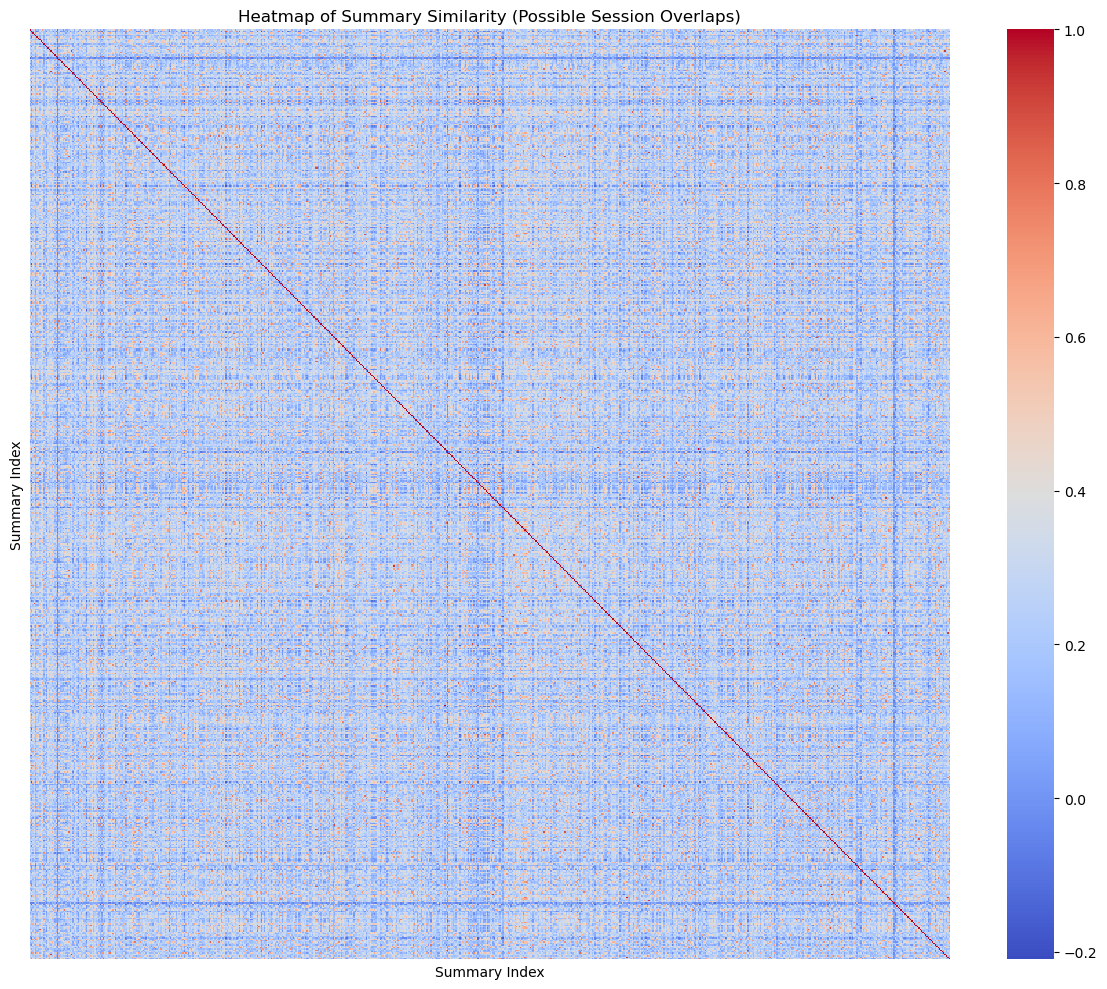

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the data

summaries =df['Cleaned_Summary'].dropna().astype(str).reset_index(drop=True)

# Generate BERT embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(summaries.tolist(), show_progress_bar=True)

# Calculate similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Visualize as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Heatmap of Summary Similarity (Possible Session Overlaps)")
plt.xlabel("Summary Index")
plt.ylabel("Summary Index")
plt.tight_layout()
plt.show()


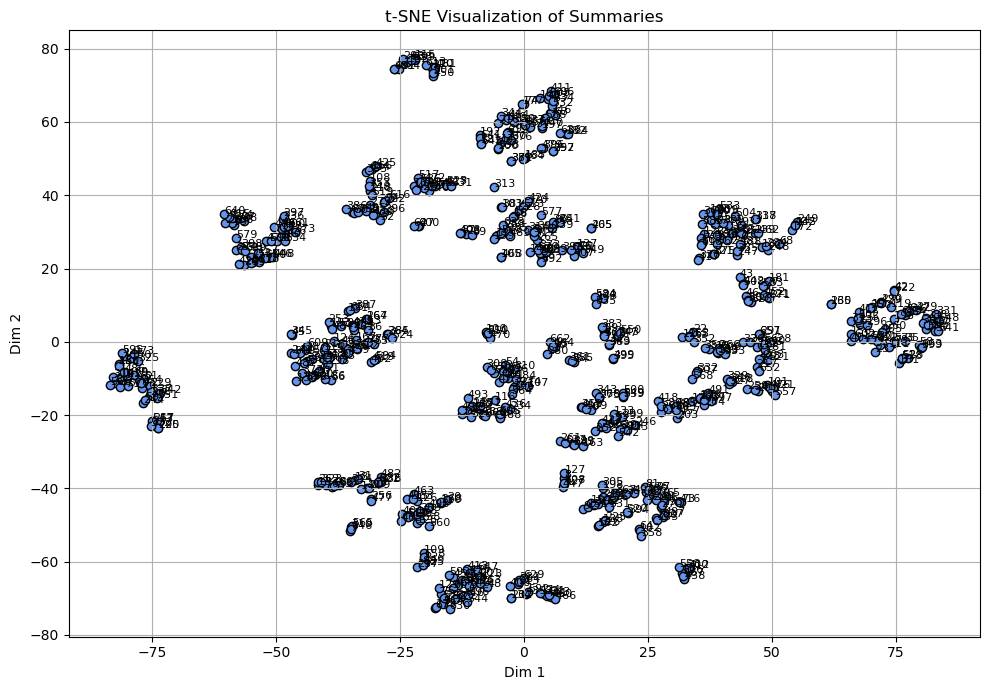

In [99]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNE projection to 2D
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='cornflowerblue', edgecolor='k')
for i, txt in enumerate(range(len(summaries))):
    plt.annotate(txt, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=8)
plt.title("t-SNE Visualization of Summaries")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.tight_layout()
plt.show()


Clustering summaries into sessions


Batches:   0%|          | 0/21 [00:00<?, ?it/s]

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



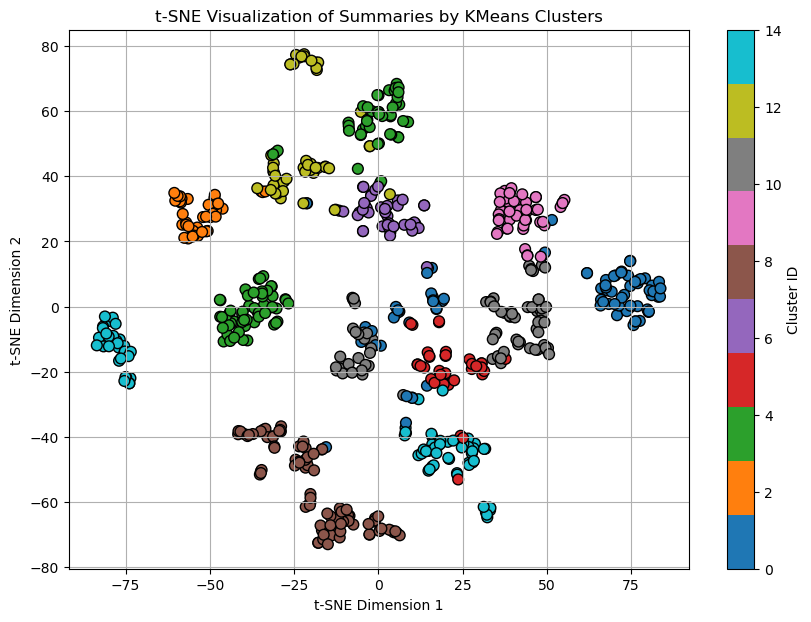

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Load your Excel file

summaries = df['Cleaned_Summary'].dropna().astype(str).reset_index(drop=True)

# BERT Embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(summaries.tolist(), show_progress_bar=True)

# KMeans Clustering
k = 15  # You can change this to find the optimal number
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings)

# Create clustered DataFrame
kmeans_df = pd.DataFrame({
    'Summary': summaries,
    'Cluster': kmeans_labels
}).sort_values(by='Cluster').reset_index(drop=True)

# t-SNE for Visualization
tsne = TSNE(n_components=2, perplexity=5, random_state=42, init='pca', learning_rate='auto')
tsne_embeddings = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=kmeans_labels, cmap='tab10', s=60, edgecolor='k')
plt.title("t-SNE Visualization of Summaries by KMeans Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(scatter, label="Cluster ID")
plt.grid(True)
plt.show()

In [122]:
import pandas as pd
import re
import html
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Excel file
file_path = "Session-Summary-for-E6-project.xlsx"
df = pd.read_excel(file_path)

# Step 2: Clean the summaries
def clean_text(text):
    text = html.unescape(text)                    # Decode HTML entities like &amp;
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)    # Remove non-ASCII chars like â€™
    text = re.sub(r'\s+', ' ', text)              # Normalize whitespace
    return text.strip()

df['Cleaned_Summary'] = df['Session_Summary'].astype(str).apply(clean_text)

# Step 3: Create embeddings using BERT
model = SentenceTransformer("all-MiniLM-L6-v2")
summaries = df['Cleaned_Summary'].dropna().reset_index(drop=True)
embeddings = model.encode(summaries.tolist(), show_progress_bar=True)

# Step 4: Apply KMeans clustering
k = 15  # Adjust as needed
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Step 5: Add cluster info to DataFrame
df = df.loc[summaries.index]
df['Cluster'] = cluster_labels

# Step 6: Save to Excel
output_file_path = "clustered_session_summaries.xlsx"
df.to_excel(output_file_path, index=False)

output_file_path


Batches:   0%|          | 0/21 [00:00<?, ?it/s]

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



'clustered_session_summaries.xlsx'

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

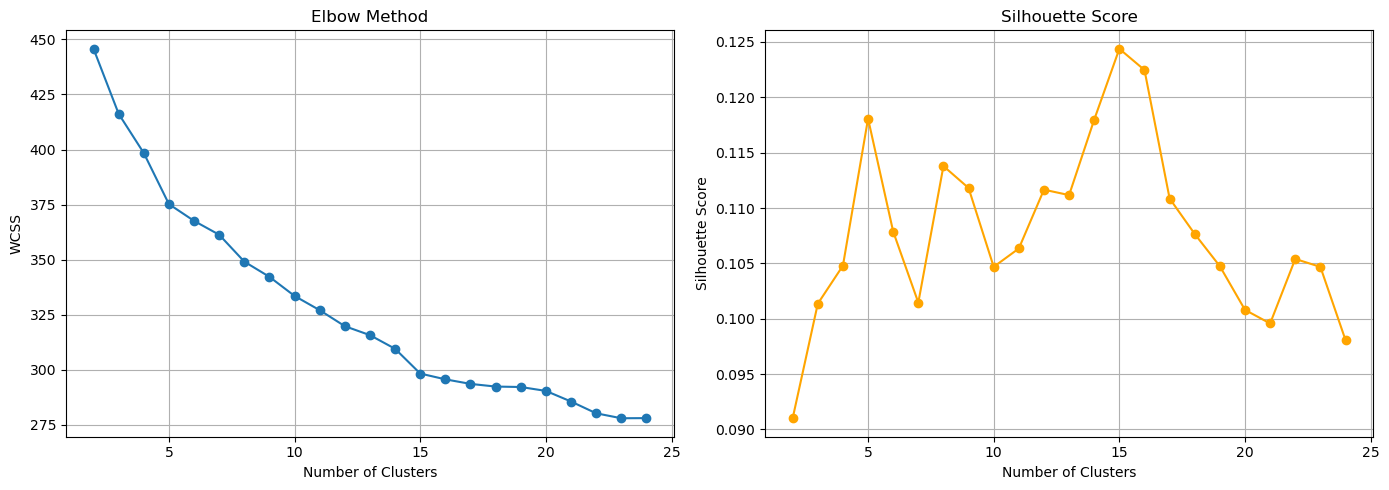

In [113]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# embeddings should be your BERT embeddings
wcss = []
silhouette_scores = []
K = range(2, 25)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(embeddings, labels))

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
ax[0].plot(K, wcss, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('WCSS')
ax[0].grid(True)

# Silhouette Score
ax[1].plot(K, silhouette_scores, marker='o', color='orange')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid(True)

plt.tight_layout()
plt.show()


checking summaries cluster

In [130]:
import pandas as pd
import numpy as np
import re
import html
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Step 1: Define text cleaning function
def clean_text(text):
    text = html.unescape(text)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII chars
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# 🔹 Step 2: Load and clean data
df = pd.read_excel("Session-Summary-for-E6-project.xlsx")
df['Cleaned_Summary'] = df['Session_Summary'].astype(str).apply(clean_text)
summaries = df['Cleaned_Summary'].dropna().reset_index()

# 🔹 Step 3: Embed the cleaned summaries
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(summaries['Cleaned_Summary'].tolist(), show_progress_bar=True)

# 🔹 Step 4: Cluster the embeddings
k = 15
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)
summaries['Cluster'] = cluster_labels

# 🔹 Step 5: Prepare new summary
new_summary = """
ds 203 15 january, 2025 (3rd lecture)
sir started by talking about y = f(x). he first talked about old and new methods of data analysis. for this he took the example of finding the temperature difference between the two ends of a pipe using the flow rate of the fluid flowing inside the pipe. y was the temperature difference denoted by delta-t and x was the flow rate.
in the old methods we used to get the equation relating y = f(x) like dt = l23, while in the new methods we get data points and obtain a plot of the curve which relates temperature difference with the corresponding flow rate.
then he talked about the methods that we use for obtaining the plot which are:
1. slr - simple linear regression
2. mlr - multiple linear regression
3. logistic regression
4. random forest
he also mentioned k-means clustering and hierarchical clustering.
then he said that there are two paths which are machine-learning and the other one is statistics, in this course we would frequently move from one path to another to get the assigned task done.
he then started talking about levels of measurement. there are four levels of measurement:
1. nominal (discrete): for example, gender, color, etc.
2. ordinal (discrete): for example, grades
3. interval (continuous): for example, temperature
4. ratio (continuous): for example, height, weight, salary
y is known as label and x is known as feature.
supervised and unsupervised learning problems
then sir defined a function monthly-purchases = f (salary, month of year, size of family, etc.)
nominal - classification
ordinal - classification
interval - regression
ratio - regression
unsupervised learning: we don’t know the value of labels associated with features.
hierarchical and k-means clustering
we take a representative sample out of the population in order to save time and money for data analysis.
larger the value of the population more accurate is the prediction.
"""

# 🔹 Step 6: Clean and embed new summary
cleaned_new_summary = clean_text(new_summary)
new_embedding = model.encode([cleaned_new_summary])

# 🔹 Step 7: Assign to nearest cluster
centroids = kmeans.cluster_centers_
similarities_to_centroids = cosine_similarity(new_embedding, centroids)[0]
assigned_cluster = np.argmax(similarities_to_centroids)

print(f"\n🧠 New summary assigned to Cluster {assigned_cluster}")
print(f"📈 Similarity to this cluster centroid: {similarities_to_centroids[assigned_cluster]:.4f}")

# 🔹 Step 8: Compare with cluster summaries
cluster_indices = summaries[summaries['Cluster'] == assigned_cluster].index
cluster_embeddings = [embeddings[i] for i in cluster_indices]
cluster_texts = summaries.loc[cluster_indices, 'Cleaned_Summary'].tolist()

similarities_to_cluster = cosine_similarity(new_embedding, cluster_embeddings)[0]
top_indices = np.argsort(similarities_to_cluster)[-3:][::-1]

# 🔹 Step 9: Display top 3 similar summaries
print("\n🔗 Top 3 Similar Summaries in Assigned Cluster:")
for rank, i in enumerate(top_indices, 1):
    print(f"\n#{rank} (Similarity: {similarities_to_cluster[i]:.4f})")
    print(cluster_texts[i])


Batches:   0%|          | 0/21 [00:00<?, ?it/s]

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.




🧠 New summary assigned to Cluster 3
📈 Similarity to this cluster centroid: 0.5974

🔗 Top 3 Similar Summaries in Assigned Cluster:

#1 (Similarity: 0.9935)
ds 203 15 january, 2025 (3rd lecture) sir started by talking about y = f(x). he first talked about old and new methods of data analysis. for this he took the example of finding the temperature difference between the two ends of a pipe using the flow rate of the fluid flowing inside the pipe. y was the temperature difference denoted by delta-t and x was the flow rate. in the old methods we used to get the equation relating y = f(x) like dt = l23, while in the new methods we get data points and obtain a plot of the curve which relates temperature difference with the corresponding flow rate. then he talked about the methods that we use for obtaining the plot which are: 1. slr simple linear regression 2. mlr multiple linear regression 3. logistic regression 4. random forest he also mentioned k-means clustering and hierarchical clusterin

Rank the summaries within a session in terms of their detail and relevance to the overall session.

In [139]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Add embeddings to the DataFrame
summaries['Embedding'] = list(embeddings)

# Create a new DataFrame to hold rankings
ranked_summaries = []

# Rank summaries inside each cluster based on similarity to the cluster centroid
for cluster_id in sorted(summaries['Cluster'].unique()):
    cluster_data = summaries[summaries['Cluster'] == cluster_id].copy()

    # Get embeddings from the cluster
    cluster_embeddings = np.vstack(cluster_data['Embedding'].values)
    
    # Calculate centroid embedding of this cluster
    centroid = np.mean(cluster_embeddings, axis=0).reshape(1, -1)
    
    # Compute cosine similarity of each summary with the cluster centroid
    relevance_scores = cosine_similarity(cluster_embeddings, centroid).flatten()
    
    # Add scores and rank
    cluster_data['Relevance_Score'] = relevance_scores
    cluster_data['Rank_within_Cluster'] = cluster_data['Relevance_Score'].rank(ascending=False, method='first').astype(int)
    
    # Sort for display (optional)
    cluster_data = cluster_data.sort_values(by='Relevance_Score', ascending=False)
    
    ranked_summaries.append(cluster_data)

# Combine all ranked summaries
ranked_df = pd.concat(ranked_summaries).reset_index(drop=True)

# View top 3 summaries for each cluster/session
for cluster_id in sorted(ranked_df['Cluster'].unique()):
    print(f"\n📚 Top 3 Summaries in Session {cluster_id}")
    top_3 = ranked_df[ranked_df['Cluster'] == cluster_id].sort_values(by='Relevance_Score', ascending=False).head(3)
    for _, row in top_3.iterrows():
        print(f"  🏅 Rank {row['Rank_within_Cluster']} (Score: {round(row['Relevance_Score'], 3)}) - Serial {row['index']}")
        print(f"     {row['Cleaned_Summary']}\n")



📚 Top 3 Summaries in Session 0
  🏅 Rank 1 (Score: 0.849) - Serial 434
     population vs sample, sample is a subset of population. we also learned that which statistics measure can be used in which of the level of measurement. if we estimate, for population, than it is called a parameter and in case of sample, when we calculate, it is called statistic. before applying any ml techniques, we should first gain a basic knowledge about the data which is usually done by a scatter plot. we learnt about the simple linear regression, where there is only one predictor. generally, in slr, we take y as the dependent variable and x as the independent variable. we also say that the y intercept on slr is called bias. here we find that b0 and b1 are estimates of parameters of the population. to take account of error, we define a confidence interval. if we have a large confidence, then our interval will be large and vice versa. to provide uniformity in all the directions of errors, we take sigma ei^2 

Create visualizations

In [73]:
!pip install keybert sentence-transformers plotly pandas scikit-learn openpyxl


In [142]:
from keybert import KeyBERT
import pandas as pd
import plotly.express as px

# Initialize KeyBERT with the same BERT model
kw_model = KeyBERT(model='all-MiniLM-L6-v2')

session_keywords = {}
keyword_counts = []

for cluster_id in sorted(summaries['Cluster'].unique()):
    cluster_summaries = summaries[summaries['Cluster'] == cluster_id]['Cleaned_Summary']
    combined_text = " ".join(cluster_summaries)

    # Step 1: Extract up to 100 keywords
    candidates = kw_model.extract_keywords(
        combined_text,
        keyphrase_ngram_range=(1, 2),
        stop_words='english',
        top_n=100
    )

    # Step 2: Filter by score threshold
    threshold = 0.4  # adjust if needed
    keywords = [(kw, score) for kw, score in candidates if score >= threshold]

    # Step 3: Store results
    session_keywords[cluster_id] = dict(keywords)
    keyword_counts.append(len(keywords))

# Create updated DataFrame for bubble chart
bubble_df = pd.DataFrame({
    'Session': [f'Session {i}' for i in range(len(keyword_counts))],
    'Keyword Count': keyword_counts,
    'Cluster ID': list(range(len(keyword_counts)))
})

# Create and show the bubble chart
fig = px.scatter(bubble_df, x='Cluster ID', y='Keyword Count', size='Keyword Count',
                 hover_name='Session', title='📘 Sessions Bubble Chart (Dynamic Keywords)',
                 labels={'Keyword Count': 'BERT Keywords (Score ≥ 0.4)'}, size_max=60)
fig.show()





In [70]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 3.7 MB/s eta 0:00:00


In [72]:
!pip install keybert

   ---------------------------------------- 0.0/41.4 kB ? eta -:--:--
   ---------------------------------------- 41.4/41.4 kB 1.9 MB/s eta 0:00:00


Wordcloud with Precomputed keyword-frequency dictionary

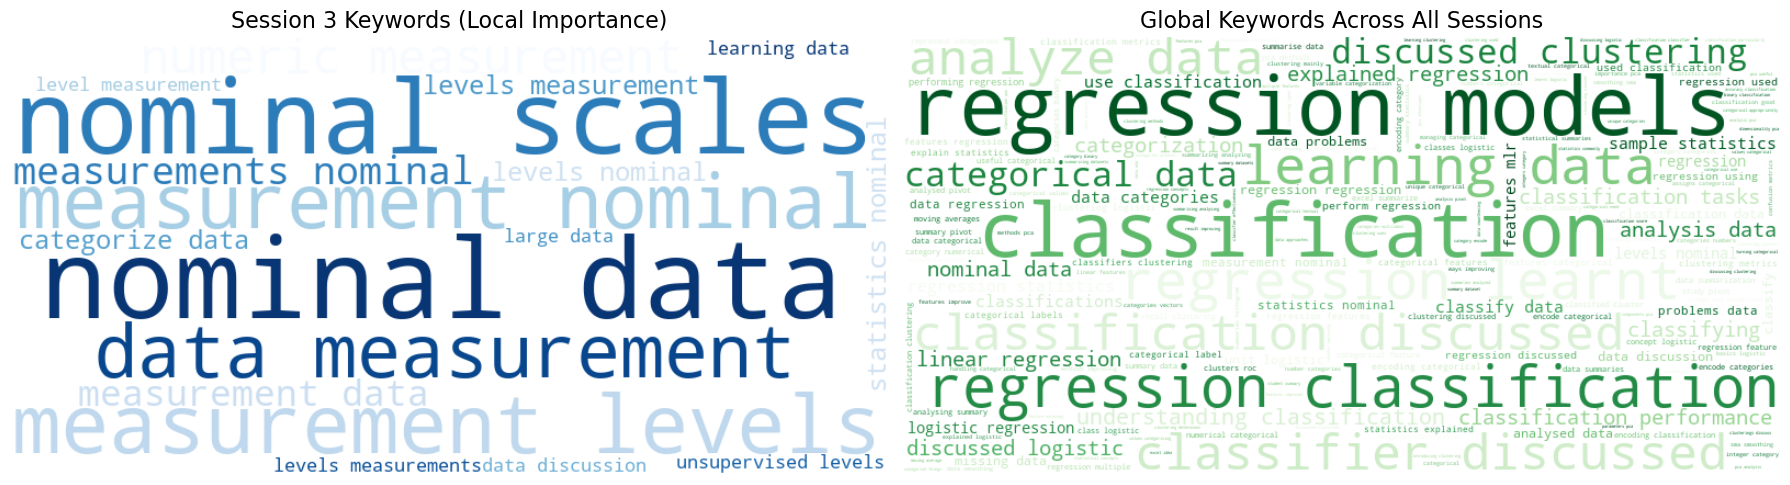

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Example: Change this to the session ID (cluster number) you want to visualize
session_id = 3  # e.g., 0, 1, 2, ..., 18

# 1. Get keywords for the selected session
session_kw = session_keywords.get(session_id, {})
if not session_kw:
    print(f"No keywords found for session {session_id}")
else:
    # 2. Generate session-specific word cloud
    session_wc = WordCloud(width=800, height=400, background_color='white',
                           colormap='Blues').generate_from_frequencies(session_kw)

    # 3. Generate global keyword frequency (all sessions combined)
    from collections import Counter
    global_kw_freq = Counter()
    for kws in session_keywords.values():
        global_kw_freq.update(kws)

    global_wc = WordCloud(width=800, height=400, background_color='white',
                          colormap='Greens').generate_from_frequencies(global_kw_freq)

    # 4. Plot both side by side
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes[0].imshow(session_wc, interpolation='bilinear')
    axes[0].set_title(f"Session {session_id} Keywords (Local Importance)", fontsize=16)
    axes[0].axis('off')

    axes[1].imshow(global_wc, interpolation='bilinear')
    axes[1].set_title("Global Keywords Across All Sessions", fontsize=16)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()



Wordcloud with raw data(cleaned)

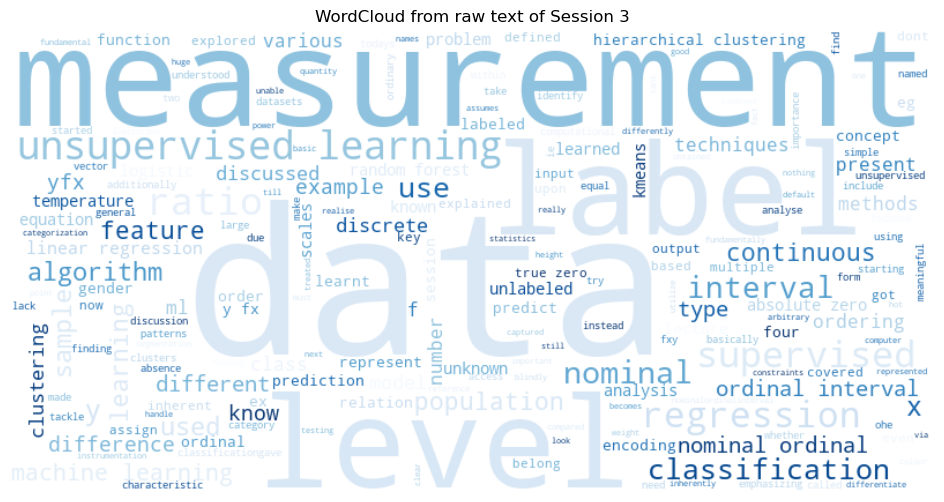

In [110]:
from wordcloud import WordCloud

# Example: Change this to the session ID (cluster number) you want to visualize
session_id = 3  # e.g., 0 to 18

# 1. Filter summaries belonging to the selected session
session_texts = summaries[summaries['Cluster'] == session_id]['Cleaned_Summary'].tolist()

# 2. Combine all summaries into one large string
combined_text = " ".join(session_texts)

# 3. (Optional) Clean the text if needed
# For basic cleanup, you might use:
import re
cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", combined_text.lower())

# 4. Generate WordCloud from text
session_wc_raw = WordCloud(width=800, height=400, background_color='white',
                           colormap='Blues').generate(cleaned_text)

# 5. Show the word cloud (requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.imshow(session_wc_raw, interpolation='bilinear')
plt.axis('off')
plt.title(f"WordCloud from raw text of Session {session_id}")
plt.show()


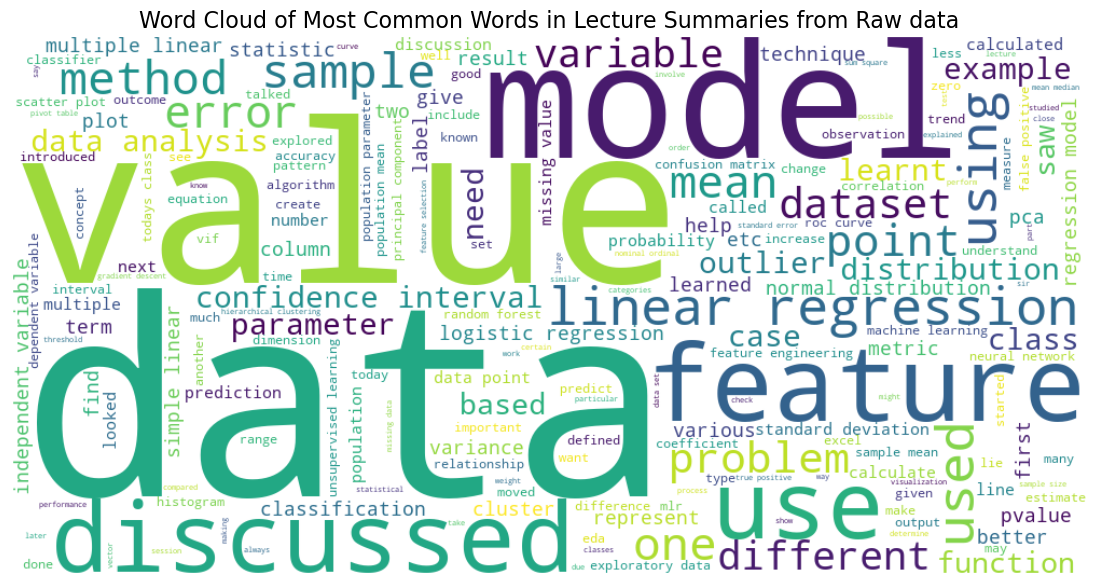

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text
cleaned_text = " ".join(filtered_words)  # filtered_words from previous step

# Create a word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      max_words=200, colormap='viridis').generate(cleaned_text)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Common Words in Lecture Summaries from Raw data", fontsize=16)
plt.show()


webApp
